In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import requests

In [11]:
# Mengambil data dari endpoint
url = "https://gist.githubusercontent.com/nadirbslmh/93b62fdcfa694d4ec07bed9b3c94e401/raw/c07971341361e23fd4f3a880437c4d8e4ebcfafc/stock_trades.json"
data = pd.read_json(url)
data

,trade_id,stock_symbol,trade_date,trade_time,trade_price,trade_volume,buyer_id,seller_id,trade_type,currency
0,1,GOOGL,1/5/2017,3,675.51,501030,1,1,sell,EUR
1,2,NVDA,3/27/2017,13,559.39,51823,2,2,buy,ZAR
2,3,NFLX,11/7/2015,0,811.33,684430,3,3,sell,ZWL
3,4,MSFT,5/29/2017,22,231.21,237465,4,4,buy,IDR
4,5,JPM,11/8/2012,16,699.15,800344,5,5,buy,HRK
...,...,...,...,...,...,...,...,...,...,...
995,996,JPM,11/11/2014,19,208.69,54629,996,996,buy,CNY
996,997,GOOGL,9/24/2018,9,829.10,365834,997,997,sell,RUB
997,998,MSFT,5/2/2012,16,346.35,891372,998,998,sell,EUR
998,999,NVDA,10/9/2010,0,935.36,483631,999,999,sell,PKR


In [28]:
# Mengonversi harga transaksi ke dalam satuan rupiah jika mata uangnya bukan IDR
data['trade_price'] * 15000

max_purchase_idr = data[data['trade_type'] == 'buy']['trade_price'].max()
print(f"Harga beli saham tertinggi dalam IDR: {max_purchase_idr:.2f} IDR")

Harga beli saham tertinggi dalam IDR: 996.87 IDR


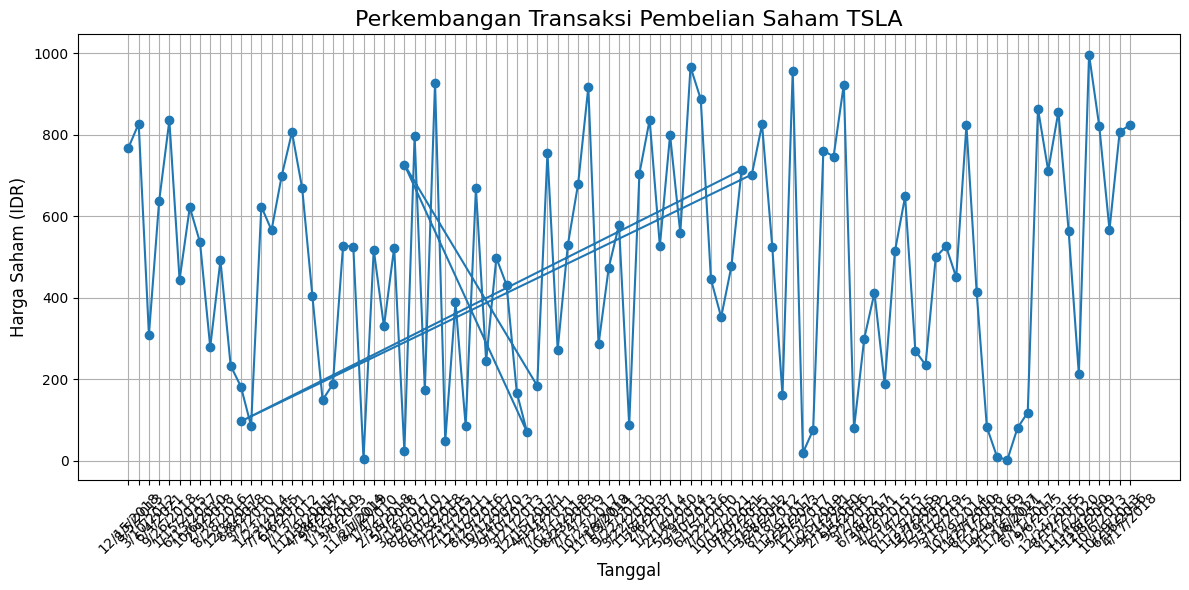

In [15]:
# Perkembangan transaksi pembelian saham TSLA
tsla_transactions = data[data['stock_symbol'] == 'TSLA']
plt.figure(figsize=(12, 6))
plt.plot(tsla_transactions['trade_date'], tsla_transactions['trade_price'], marker='o', linestyle='-')
plt.title('Perkembangan Transaksi Pembelian Saham TSLA', fontsize=16)
plt.xlabel('Tanggal', fontsize=12)
plt.ylabel('Harga Saham (IDR)', fontsize=12)
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

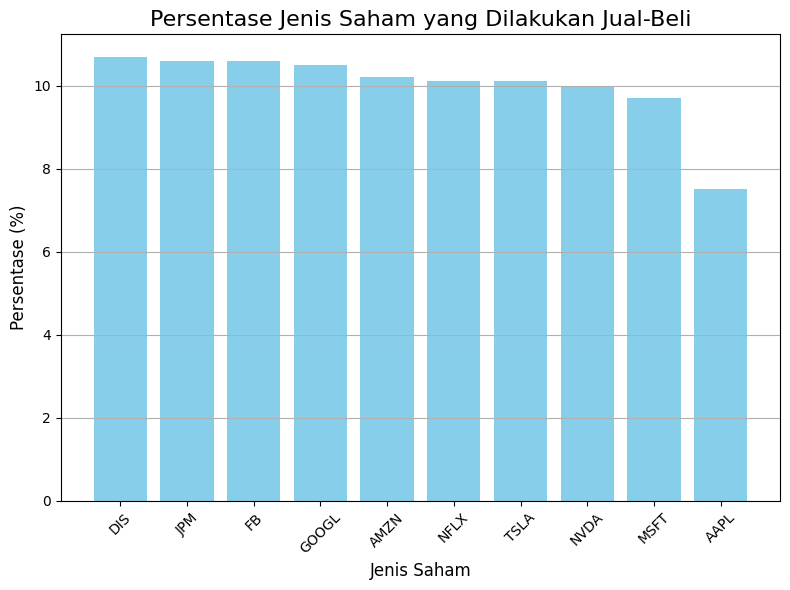

In [16]:
# Persentase jenis saham yang dilakukan proses jual-beli
stock_type_percentage = data['stock_symbol'].value_counts(normalize=True) * 100
plt.figure(figsize=(8, 6))
plt.bar(stock_type_percentage.index, stock_type_percentage.values, color='skyblue')
plt.title('Persentase Jenis Saham yang Dilakukan Jual-Beli', fontsize=16)
plt.xlabel('Jenis Saham', fontsize=12)
plt.ylabel('Persentase (%)', fontsize=12)
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.tight_layout()
plt.show()


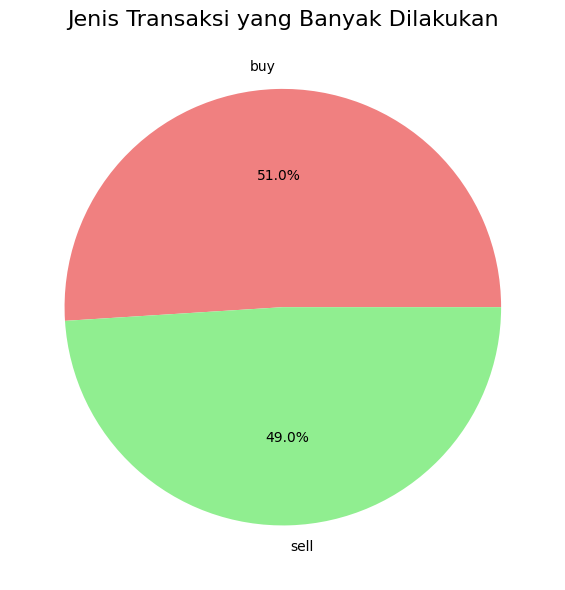

In [19]:
# Jenis transaksi yang banyak dilakukan (buy / sell)
transaction_type_counts = data['trade_type'].value_counts()
plt.figure(figsize=(8, 6))
plt.pie(transaction_type_counts, labels=transaction_type_counts.index, autopct='%1.1f%%', colors=['lightcoral', 'lightgreen'])
plt.title('Jenis Transaksi yang Banyak Dilakukan', fontsize=16)
plt.tight_layout()
plt.show()

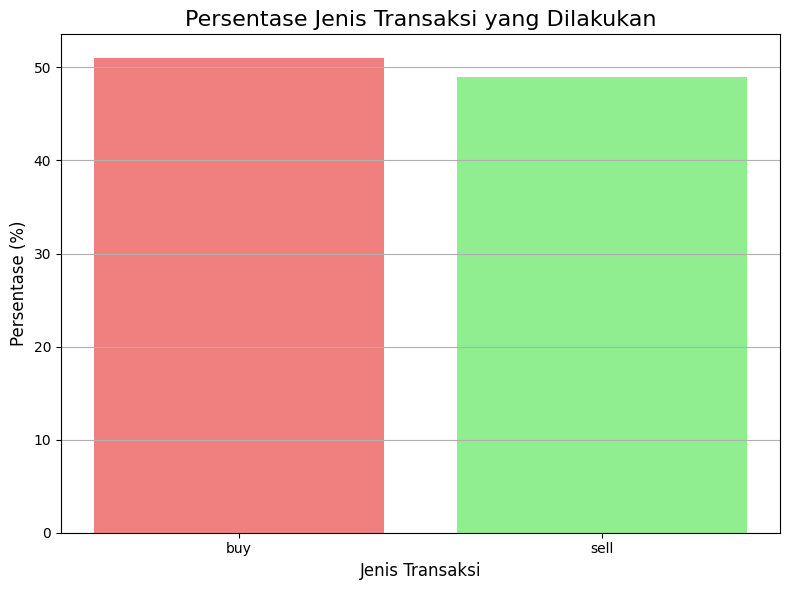

In [24]:
# Persentase jenis transaksi yang dilakukan
transaction_type_percentage = data['trade_type'].value_counts(normalize=True) * 100
plt.figure(figsize=(8, 6))
plt.bar(transaction_type_percentage.index, transaction_type_percentage.values, color=['lightcoral', 'lightgreen'])
plt.title('Persentase Jenis Transaksi yang Dilakukan', fontsize=16)
plt.xlabel('Jenis Transaksi', fontsize=12)
plt.ylabel('Persentase (%)', fontsize=12)
plt.xticks(rotation=0)
plt.grid(axis='y')
plt.tight_layout()
plt.show()

Rata-rata nilai transaksi jual pada setiap tahun untuk semua jenis saham:
trade_year
2010    595.853636
2011    461.509130
2012    511.494865
2013    506.719744
2014    511.767941
2015    519.342667
2016    521.328140
2017    465.900213
2018    437.184000
2019    519.863514
2020    495.057857
2021    484.993571
Name: trade_price, dtype: float64


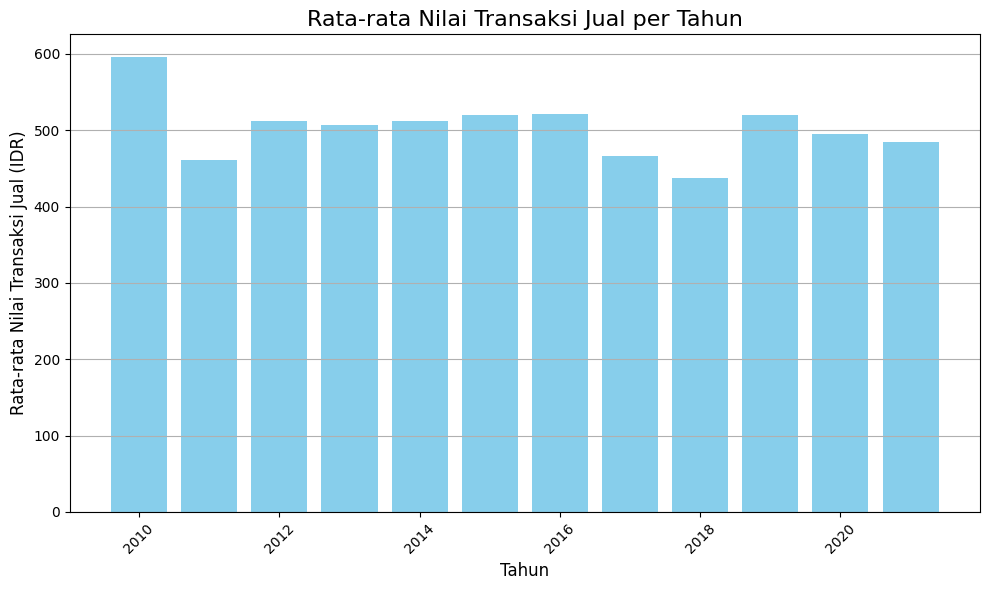

In [23]:
# Rata-rata nilai transaksi jual pada setiap tahun untuk semua jenis saham
data['trade_year'] = pd.to_datetime(data['trade_date']).dt.year
sell_transactions = data[data['trade_type'] == 'sell']
average_sell_value_by_year = sell_transactions.groupby('trade_year')['trade_price'].mean()
print("Rata-rata nilai transaksi jual pada setiap tahun untuk semua jenis saham:")
print(average_sell_value_by_year)

# Visualisasi
plt.figure(figsize=(10, 6))
plt.bar(average_sell_value_by_year.index, average_sell_value_by_year.values, color='skyblue')
plt.title('Rata-rata Nilai Transaksi Jual per Tahun', fontsize=16)
plt.xlabel('Tahun', fontsize=12)
plt.ylabel('Rata-rata Nilai Transaksi Jual (IDR)', fontsize=12)
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.tight_layout()
plt.show()